In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('Tetuan City power consumption.csv', sep=",", header=0)

display(df.head(10))


# Date Time: Each ten minutes.
# Temperature: Weather Temperature of Tetouan city.
# Humidity: Weather Humidity of Tetouan city.
# Wind Speed of Tetouan city.
# general diffuse flows
# diffuse flows
# power consumption of zone 1 of Tetouan city.
# power consumption of zone 2 of Tetouan city.
# power consumption of zone 3 of Tetouan city. 


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559000,73.800000,0.083000,0.051000,0.119000,34055.696200,16128.875380,20240.963860
1,1/1/2017 0:10,6.414000,74.500000,0.083000,0.070000,0.085000,29814.683540,19375.075990,20131.084340
2,1/1/2017 0:20,6.313000,74.500000,0.080000,0.062000,0.100000,29128.101270,19006.686930,19668.433730
3,1/1/2017 0:30,6.121000,75.000000,0.083000,0.091000,0.096000,28228.860760,18361.094220,18899.277110
4,1/1/2017 0:40,5.921000,75.700000,0.081000,0.048000,0.085000,27335.696200,17872.340430,18442.409640
5,1/1/2017 0:50,5.853000,76.900000,0.081000,0.059000,0.108000,26624.810130,17416.413370,18130.120480
6,1/1/2017 1:00,5.641000,77.700000,0.080000,0.048000,0.096000,25998.987340,16993.313070,17945.060240
7,1/1/2017 1:10,5.496000,78.200000,0.085000,0.055000,0.093000,25446.075950,16661.398180,17459.277110
8,1/1/2017 1:20,5.678000,78.100000,0.081000,0.066000,0.141000,24777.721520,16227.355620,17025.542170
9,1/1/2017 1:30,5.491000,77.300000,0.082000,0.062000,0.111000,24279.493670,15939.209730,16794.216870


### Vamos tentar prever a quantidade de consumo de energia na cidade de Tetuan

primeiramente tratando os dados

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


podemos observar que nao existem dados nao nulos/dados faltando

In [20]:
display(df.describe())

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


##### de uma forma geral podemos ver que os dados não apresentam valores estranhos, não existem valores zerados/negativos
##### porem os valroes de Wind Speed,general diffuse flows e diffuse flows variam muito de 50% ate 75% e nao sei porque 
##### vamos montar os gráficos para investigar mais

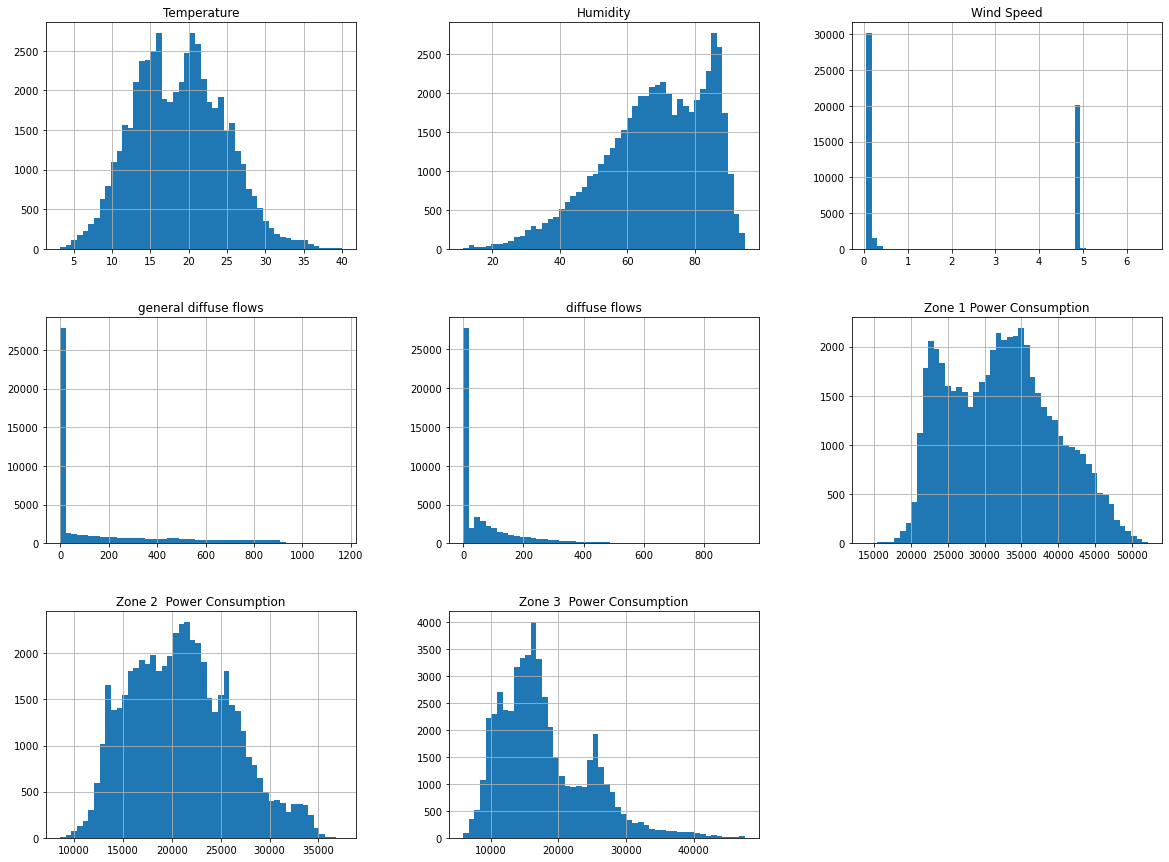

In [21]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

regiao que mais consome?

##### BoxPlots

<AxesSubplot:>

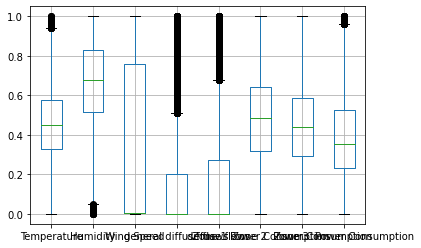

In [22]:
from pydoc import describe
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import percentile

df_data = df['DateTime']

df = df.drop(['DateTime'], axis=1)


# removendo outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.boxplot(
    column=['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows','Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption'])


Matriz de correlação

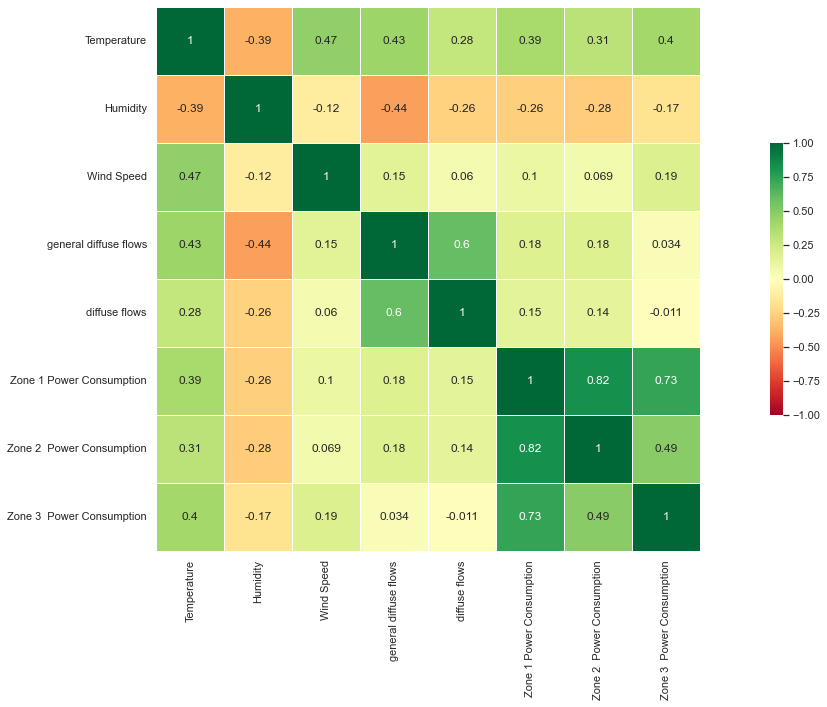

In [24]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()

Aqui podemos observar alguns fatores que fazem sentido, como a alta correlação entre o consumo nas zonas, assim como general diffuse flows e diffuse flows

time series /  juntar as zonas? 